<a href="https://colab.research.google.com/github/dev-rkoshlyak/mlinseconds_solutions/blob/helloxor_day2/HelloXor_Day_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load codebase

In [1]:
!git clone https://github.com/dev-rkoshlyak/mlinseconds_solutions.git

Cloning into 'mlinseconds_solutions'...
remote: Enumerating objects: 206, done.
remote: Counting objects: 100% (206/206), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 206 (delta 96), reused 195 (delta 90), pack-reused 0
Receiving objects: 100% (206/206), 3.11 MiB | 20.71 MiB/s, done.
Resolving deltas: 100% (96/96), done.


In [2]:
%cd mlinseconds_solutions/

/content/mlinseconds_solutions


In [3]:
!git branch -r

  origin/HEAD -> origin/master
  origin/helloxor_day1
  origin/master


In [4]:
!git checkout helloxor_day1

Branch 'helloxor_day1' set up to track remote branch 'helloxor_day1' from 'origin'.
Switched to a new branch 'helloxor_day1'


In [5]:
!git checkout -b helloxor_day2

Switched to a new branch 'helloxor_day2'


In [6]:
!git branch -v

  helloxor_day1 3212093 Update with output from long run
* helloxor_day2 3212093 Update with output from long run
  master        1275821 Move get_dataframe to ResultsData


# Edit code

In [7]:
!ls *.pickle

helloxor_day1_results_data.pickle


In [0]:
!cp helloxor_day1_results_data.pickle helloxor_day2_results_data.pickle

In [0]:
!sed -i -r 's/helloxor_day1_results_data/helloxor_day2_results_data/' ./mlis/problems/helloXor.py

In [10]:
!git diff

diff --git a/mlis/problems/helloXor.py b/mlis/problems/helloXor.py
index a65993a..3079342 100644
--- a/mlis/problems/helloXor.py
+++ b/mlis/problems/helloXor.py
@@ -148,7 +148,7 @@ if run_grid_search:
     parser.add_argument('-max_steps', type=int, nargs='+', default=[100])
     parser.add_argument('-hidden_size', type=int, nargs='+', default=[1])
     parser.add_argument('-learning_rate', type=float, nargs='+', default=[1.0])
-    results_file = 'helloxor_day1_results_data.pickle'
+    results_file = 'helloxor_day2_results_data.pickle'
     results_data = gs.ResultsData.load(results_file)
     gs.GridSearch().run(Config(), case_number=1, results_data=results_data, grid_parser=parser)
     results_data.save(results_file)


# Explore hidden size

In [11]:
from mlis.utils import gridsearch as gs
from mlis.utils import plotter as pt
import matplotlib.pyplot as plt
results_data = gs.ResultsData.load('helloxor_day2_results_data.pickle')
df = results_data.get_dataframe()
df.head()

,max_steps,hidden_size,learning_rate,type,value
0,1000,2,0.001,error,1.003844
1,1000,2,0.001,error,1.004815
2,1000,2,0.001,error,1.002031
3,1000,2,0.001,error,1.013707
4,1000,2,0.001,error,1.027174


In [12]:
results_data = gs.ResultsData.load('helloxor_day2_results_data.pickle')
df = results_data.get_dataframe()
df = df.groupby(['max_steps', 'learning_rate']).hidden_size.nunique().reset_index()
df = df.rename(index=str, columns={"hidden_size": "hs_uniq_count"})
df.query("hs_uniq_count > 1")

,max_steps,learning_rate,hs_uniq_count
201,1000,0.001,5
202,1000,0.010,5
203,1000,0.100,5
204,1000,1.000,5
222,1000,10.000,5
233,1000,100.000,5


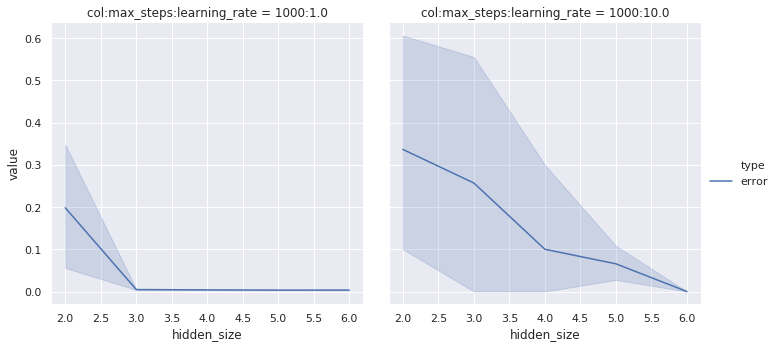

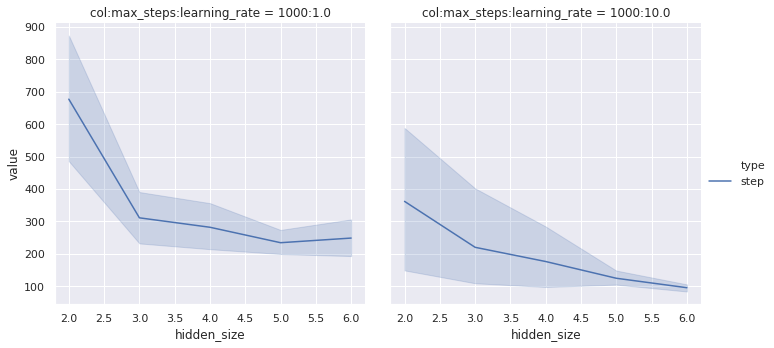

In [13]:
results_data = gs.ResultsData.load('helloxor_day2_results_data.pickle')
plotter = pt.Plotter(results_data)
plotter.show_1d(1, query="type=='error' and max_steps in [1000] and learning_rate in [1.0, 10.0]")
plotter.show_1d(1, query="type=='step' and max_steps in [1000] and learning_rate in [1.0, 10.0]")

Let's generate new data with max_steps 100 and learning_rate 3.5 and 8.5

In [14]:
!python3 -m mlis.problems.helloXor -max_steps 100 -hidden_size `seq 2 1 20` -learning_rate 3.5 8.5 -iter_number 10

Local CPU time mult = 0.17
max_steps:100 hidden_size:2 learning_rate:3.5 => Error 0.666158139705658 0.23025545477867126 Step 97.0999984741211 4.724639892578125
max_steps:100 hidden_size:2 learning_rate:8.5 => Error 0.7358729243278503 0.08191727846860886 Step 97.0999984741211 7.5784783363342285
max_steps:100 hidden_size:3 learning_rate:3.5 => Error 0.2933690547943115 0.252731591463089 Step 86.0999984741211 13.13561725616455
max_steps:100 hidden_size:3 learning_rate:8.5 => Error 0.7005852460861206 0.23050864040851593 Step 93.69999694824219 8.287205696105957
max_steps:100 hidden_size:4 learning_rate:3.5 => Error 0.2567974627017975 0.20879940688610077 Step 86.30000305175781 11.175867080688477
max_steps:100 hidden_size:4 learning_rate:8.5 => Error 0.5919787883758545 0.32695940136909485 Step 85.4000015258789 17.27039909362793
max_steps:100 hidden_size:5 learning_rate:3.5 => Error 0.22445666790008545 0.22789353132247925 Step 80.40047454833984 12.414597511291504
max_steps:100 hidden_size:5 lea

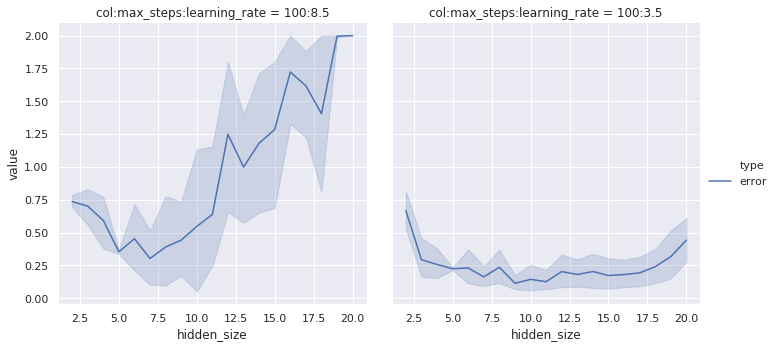

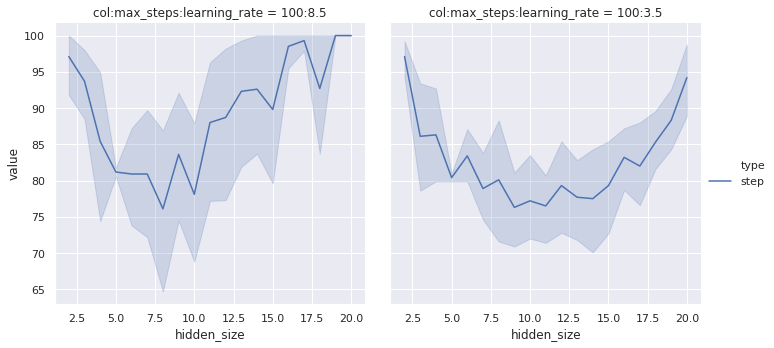

In [15]:
results_data = gs.ResultsData.load('helloxor_day2_results_data.pickle')
plotter = pt.Plotter(results_data)
plotter.show_1d(1, query="type=='error' and max_steps in [100] and learning_rate in [3.5, 8.5]")
plotter.show_1d(1, query="type=='step' and max_steps in [100] and learning_rate in [3.5, 8.5]")

Let's improve confidence with 100 iterations. But look like we see same pattern here, first both our mettrics go down and then around hidden size 8 it start going up. We would like to understand why we see such behaviour. We can explain negative slop from 2 till 8 by the fact that neuron network getting bigger and more flexible in learning, but what happens after 8?

In [16]:
!python3 -m mlis.problems.helloXor -max_steps 100 -hidden_size `seq 2 1 20` -learning_rate 3.5 8.5 -iter_number 100

Local CPU time mult = 0.76
max_steps:100 hidden_size:2 learning_rate:3.5 => Error 0.5504392385482788 0.2710064649581909 Step 94.18181610107422 8.868231773376465
max_steps:100 hidden_size:2 learning_rate:8.5 => Error 0.7061793804168701 0.17594920098781586 Step 96.43636322021484 8.223402976989746
max_steps:100 hidden_size:3 learning_rate:3.5 => Error 0.35072121024131775 0.25471413135528564 Step 87.38182067871094 12.655623435974121
max_steps:100 hidden_size:3 learning_rate:8.5 => Error 0.6092848181724548 0.28656691312789917 Step 93.09091186523438 10.408663749694824
max_steps:100 hidden_size:4 learning_rate:3.5 => Error 0.2629619836807251 0.24268974363803864 Step 82.7727279663086 12.702423095703125
max_steps:100 hidden_size:4 learning_rate:8.5 => Error 0.4654252529144287 0.3479962944984436 Step 86.51818084716797 14.762792587280273
max_steps:100 hidden_size:5 learning_rate:3.5 => Error 0.2252262532711029 0.22842992842197418 Step 80.46216583251953 12.376688957214355
max_steps:100 hidden_size

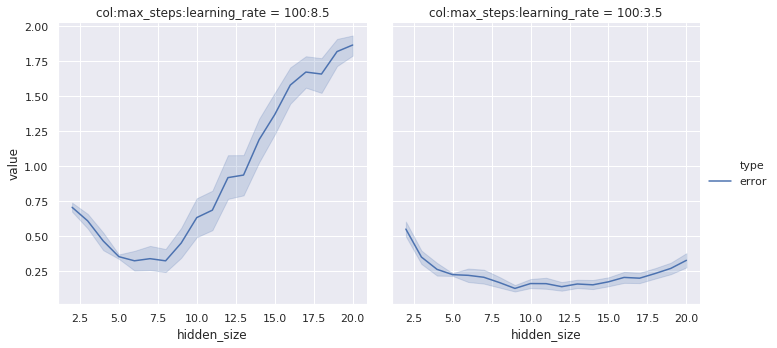

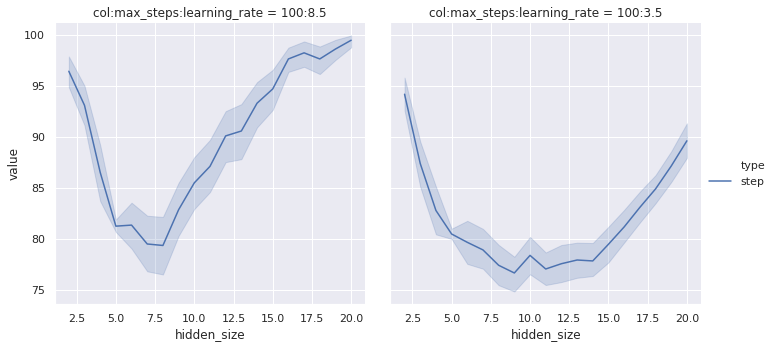

In [17]:
results_data = gs.ResultsData.load('helloxor_day2_results_data.pickle')
plotter = pt.Plotter(results_data)
plotter.show_1d(1, query="type=='error' and max_steps in [100] and learning_rate in [3.5, 8.5]")
plotter.show_1d(1, query="type=='step' and max_steps in [100] and learning_rate in [3.5, 8.5]")

Okay, so pattern is clear now. We see that it more drastic for learning rate 8.5 and less drastic for 3.5. Ideally, we would like to see 2D graph here over learning_rate and hidden_size at same time.

In [18]:
!python3 -m mlis.problems.helloXor -max_steps 100 -hidden_size `seq 2 1 20` -learning_rate `seq 1.0 1.0 10.0` -iter_number 10

Local CPU time mult = 0.76
max_steps:100 hidden_size:2 learning_rate:1.0 => Error 0.9906560182571411 0.018051069229841232 Step 100.0 0.0
max_steps:100 hidden_size:2 learning_rate:2.0 => Error 0.8985062837600708 0.15933409333229065 Step 100.0 0.0
max_steps:100 hidden_size:2 learning_rate:3.0 => Error 0.875673770904541 0.1694367378950119 Step 100.0 0.0
max_steps:100 hidden_size:2 learning_rate:4.0 => Error 0.5631985664367676 0.2662461996078491 Step 96.80000305175781 4.263540744781494
max_steps:100 hidden_size:2 learning_rate:5.0 => Error 0.7282999753952026 0.2510695457458496 Step 99.0999984741211 2.8460497856140137
max_steps:100 hidden_size:2 learning_rate:6.0 => Error 0.7068380117416382 0.13071998953819275 Step 98.5999984741211 4.427188873291016
max_steps:100 hidden_size:2 learning_rate:7.0 => Error 0.7060954570770264 0.07205236703157425 Step 98.80000305175781 3.4576807022094727
max_steps:100 hidden_size:2 learning_rate:8.0 => Error 0.69990074634552 0.044472333043813705 Step 97.19999694

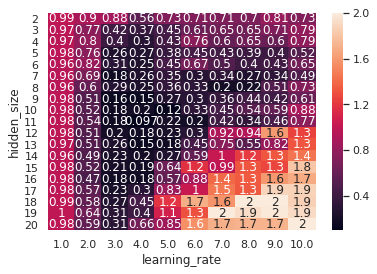

In [19]:
import seaborn as sns
results_data = gs.ResultsData.load('helloxor_day2_results_data.pickle')
df = results_data.get_dataframe()
df = df.query('max_steps in [100] and learning_rate in [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]')
df = df.groupby(['hidden_size', 'learning_rate', 'type']).agg({'value':['count', 'mean', 'std']})
df.columns = ["_".join(x) for x in df.columns.ravel()]
df = df.reset_index()
hm = df.query("type=='error'").pivot("hidden_size", "learning_rate", "value_mean")
sns.heatmap(hm, annot=True)

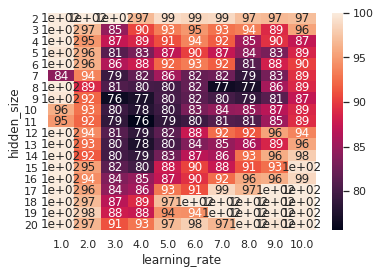

In [20]:
hm = df.query("type=='step'").pivot("hidden_size", "learning_rate", "value_mean")
sns.heatmap(hm, annot=True)

Let's run long run, in order to get better quality heat map and now explore what we got.  We can defenetly confirm that with increase hidden size we get higher value on both of networks. It is more drastic with bigger learning rate. Theory for now that this is because we saturate sigmoid. Let's check this idea out.

In [21]:
!python3 -m mlis.problems.helloXor -max_steps 100 -hidden_size `seq 2 1 20` -learning_rate `seq 1.0 1.0 10.0` -iter_number 100

Local CPU time mult = 0.77
max_steps:100 hidden_size:2 learning_rate:1.0 => Error 0.9893307089805603 0.021985795348882675 Step 100.0 0.0
max_steps:100 hidden_size:2 learning_rate:2.0 => Error 0.8701876997947693 0.19514624774456024 Step 99.0545425415039 4.5045061111450195
max_steps:100 hidden_size:2 learning_rate:3.0 => Error 0.6616628766059875 0.32769882678985596 Step 94.47272491455078 9.996980667114258
max_steps:100 hidden_size:2 learning_rate:4.0 => Error 0.5356139540672302 0.25733837485313416 Step 94.38182067871094 8.414690017700195
max_steps:100 hidden_size:2 learning_rate:5.0 => Error 0.6397041082382202 0.2048877775669098 Step 96.75454711914062 6.189939022064209
max_steps:100 hidden_size:2 learning_rate:6.0 => Error 0.665407121181488 0.13583782315254211 Step 98.4272689819336 4.386089324951172
max_steps:100 hidden_size:2 learning_rate:7.0 => Error 0.6685378551483154 0.08709125965833664 Step 96.52727508544922 7.186517715454102
max_steps:100 hidden_size:2 learning_rate:8.0 => Error 0

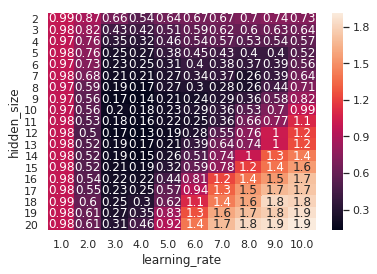

In [22]:
import seaborn as sns
results_data = gs.ResultsData.load('helloxor_day2_results_data.pickle')
df = results_data.get_dataframe()
df = df.query('max_steps in [100] and learning_rate in [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]')
df = df.groupby(['hidden_size', 'learning_rate', 'type']).agg({'value':['count', 'mean', 'std']})
df.columns = ["_".join(x) for x in df.columns.ravel()]
df = df.reset_index()
hm = df.query("type=='error'").pivot("hidden_size", "learning_rate", "value_mean")
sns.heatmap(hm, annot=True)

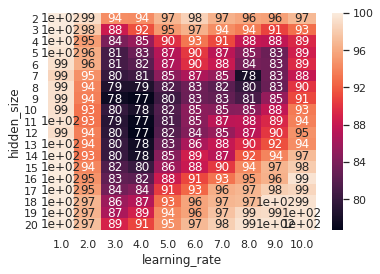

In [23]:
hm = df.query("type=='step'").pivot("hidden_size", "learning_rate", "value_mean")
sns.heatmap(hm, annot=True)

# Edit code to detect sigmoid saturation

In [24]:
!cat ./mlis/problems/helloXor.py

# HelloXor is a HelloWorld of Machine Learning.
import time
import random
import argparse
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from ..utils import solutionmanager as sm
from ..utils import gridsearch as gs

class SolutionModel(nn.Module):
    def __init__(self, input_size, output_size, solution):
        super(SolutionModel, self).__init__()
        self.input_size = input_size
        self.hidden_size = solution.hidden_size
        self.linear1 = nn.Linear(input_size, self.hidden_size)
        self.linear2 = nn.Linear(self.hidden_size, output_size)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.sigmoid(x)
        x = self.linear2(x)
        x = torch.sigmoid(x)
        return x

    def calc_error(self, output, target):
        # This is loss function
        return ((output-target)**2).sum()

    def calc_predict(self, output):
        # Simple round output to predict value
        

In [25]:
%%writefile ./mlis/problems/helloXorSaturatedTest.py
# HelloXor is a HelloWorld of Machine Learning.
import time
import random
import argparse
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from ..utils import solutionmanager as sm
from ..utils import gridsearch as gs

class SolutionModel(nn.Module):
    def __init__(self, input_size, output_size, solution):
        super(SolutionModel, self).__init__()
        self.input_size = input_size
        self.hidden_size = solution.hidden_size
        self.solution = solution
        self.linear1 = nn.Linear(input_size, self.hidden_size)
        self.linear2 = nn.Linear(self.hidden_size, output_size)
        
    def set_context(self, context):
        self.context = context

    def forward(self, x):
        x = self.linear1(x)
        if self.solution.grid_search:
            with torch.no_grad():
              self.solution.grid_search.add_result('min_linear1_{}'.format(self.context.step), x.min().item())
              self.solution.grid_search.add_result('max_linear1_{}'.format(self.context.step), x.max().item())
        x = torch.sigmoid(x)
        if self.solution.grid_search:
            with torch.no_grad():
              self.solution.grid_search.add_result('min_sigmoid1_{}'.format(self.context.step), x.min().item())
              self.solution.grid_search.add_result('max_sigmoid1_{}'.format(self.context.step), x.max().item())
        x = self.linear2(x)
        if self.solution.grid_search:
            with torch.no_grad():
              self.solution.grid_search.add_result('min_linear2_{}'.format(self.context.step), x.min().item())
              self.solution.grid_search.add_result('max_linear2_{}'.format(self.context.step), x.max().item())
        x = torch.sigmoid(x)
        return x

    def calc_error(self, output, target):
        # This is loss function
        return ((output-target)**2).sum()

    def calc_predict(self, output):
        # Simple round output to predict value
        return output.round()

class Solution():
    def __init__(self):
        # Control speed of learning
        self.learning_rate = 0.00001
        # Control number of hidden neurons
        self.hidden_size = 1
        # Maximum number of steps
        self.max_steps = 100
        # grid search will initialize this field
        self.grid_search = None
        # grid search will initialize this field
        self.iter = 0

    # Return trained model
    def train_model(self, train_data, train_target, context):
        # Model represent our neural network
        model = SolutionModel(train_data.size(1), train_target.size(1), self)
        model.set_context(context)
        # Optimizer used for training neural network
        optimizer = optim.SGD(model.parameters(), lr=self.learning_rate)
        step_till_correct = self.max_steps
        while True:
            # Report step, so we know how many steps
            context.increase_step()
            # model.parameters()...gradient set to zero
            optimizer.zero_grad()
            # evaluate model => model.forward(data)
            output = model(train_data)
            # if x < 0.5 predict 0 else predict 1
            predict = model.calc_predict(output)
            # Number of correct predictions
            correct = predict.eq(train_target.view_as(predict)).long().sum().item()
            # Total number of needed predictions
            total = predict.view(-1).size(0)
            # No more time left or learned everything, stop training
            time_left = context.get_timer().get_time_left()
            if total == correct:
                step_till_correct = min(step_till_correct, context.step)
            if context.step == self.max_steps:
                break
            # calculate error
            error = model.calc_error(output, train_target)
            # calculate deriviative of model.forward() and put it in model.parameters()...gradient
            error.backward()
            # print progress of the learning
            #self.print_stats(context.step, error, correct, total)
            # update model: model.parameters() -= lr * gradient
            optimizer.step()

    def print_stats(self, step, error, correct, total):
        if step % 1000 == 0:
            print("Step = {} Correct = {}/{} Error = {}".format(step, correct, total, error.item()))

###
###
### Don't change code after this line
###
###
class Limits:
    def __init__(self):
        self.time_limit = 2.0
        self.size_limit = 100
        self.test_limit = 1.0

class DataProvider:
    def __init__(self):
        self.number_of_cases = 10

    def create_data(self):
        data = torch.FloatTensor([
            [0.0, 0.0],
            [0.0, 1.0],
            [1.0, 0.0],
            [1.0, 1.0]
            ])
        target = torch.FloatTensor([
            [0.0],
            [1.0],
            [1.0],
            [0.0]
            ])
        return (data, target)

    def create_case_data(self, case):
        data, target = self.create_data()
        return sm.CaseData(case, Limits(), (data, target), (data, target))

class Config:
    def __init__(self):
        self.max_samples = 10000

    def get_data_provider(self):
        return DataProvider()

    def get_solution(self):
        return Solution()

run_grid_search = False
# Uncomment next line if you want to run grid search
run_grid_search = True
if run_grid_search:
    parser = argparse.ArgumentParser(description='Grid search', allow_abbrev=False)
    parser.add_argument('-iter_number', type=int, default=10)
    parser.add_argument('-max_steps', type=int, nargs='+', default=[100])
    parser.add_argument('-hidden_size', type=int, nargs='+', default=[1])
    parser.add_argument('-learning_rate', type=float, nargs='+', default=[1.0])
    results_file = 'helloxor_day2_sigmoid_saturated_results_data.pickle'
    results_data = gs.ResultsData()
    gs.GridSearch().run(Config(), case_number=1, results_data=results_data, grid_parser=parser)
    results_data.save(results_file)
else:
    # If you want to run specific case, put number here
    sm.SolutionManager().run(Config(), case_number=-1)

Writing ./mlis/problems/helloXorSaturatedTest.py


In [27]:
!time python3 -m mlis.problems.helloXorSaturatedTest -max_steps 2 -hidden_size `seq 2 10 128` -learning_rate `seq 0.0 1.0 10.0` -iter_number 100

Local CPU time mult = 0.77
[SEARCH COMPLETED]
Specify case_number, if you want to search over other case data

real	0m21.188s
user	0m19.519s
sys	0m1.465s


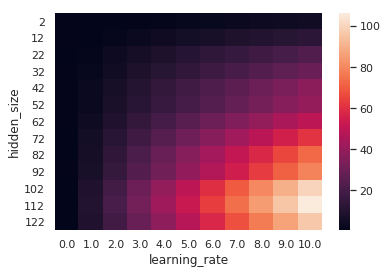

In [28]:
results_data = gs.ResultsData.load('helloxor_day2_sigmoid_saturated_results_data.pickle')
df = results_data.get_dataframe()
df = df.query('type=="max_linear2_2"')
df = df.groupby(['hidden_size', 'learning_rate', 'type']).value.max().reset_index()
hm = df.pivot('hidden_size', 'learning_rate', 'value')
sns.heatmap(hm, annot=False)

Look like we detected saturated sigmoid problem, this explain all effects that we can see. With increase of learning rate sigmoid saturate obviously because of big over step. Same happens with increase of hidden size, hovever it is less obvious.

# Work log
1.  Firstly with increase of hidden size our metric go down
2.  After around 10, increase in hidden size make matric go up
3. We confirmed that this is due to saturated sigmoid 



# Commit our work

In [31]:
!git branch
!git status

  helloxor_day1
* helloxor_day2
  master
On branch helloxor_day2
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   mlis/problems/helloXor.py

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	helloxor_day2_results_data.pickle
	helloxor_day2_sigmoid_saturated_results_data.pickle
	mlis/problems/helloXorSaturatedTest.py

no changes added to commit (use "git add" and/or "git commit -a")


In [0]:
#!git config --global user.email "rkoshlyak@gmail.com"
#!git config --global user.name "Roman Koshlyak"

In [33]:
!git add --all
!git commit -m "HelloXor day2"

[helloxor_day2 a1ef05e] HelloXor day2
 4 files changed, 165 insertions(+), 1 deletion(-)
 create mode 100644 helloxor_day2_results_data.pickle
 create mode 100644 helloxor_day2_sigmoid_saturated_results_data.pickle
 create mode 100644 mlis/problems/helloXorSaturatedTest.py


In [34]:
!git remote rm origin
!git remote add origin https://a9361321f872f2687a36ffd468ab3987c0ec703e@github.com/dev-rkoshlyak/mlinseconds_solutions.git
!git push origin helloxor_day2

Counting objects: 8, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (8/8), done.
Writing objects: 100% (8/8), 2.38 MiB | 2.55 MiB/s, done.
Total 8 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
remote: 
remote: Create a pull request for 'helloxor_day2' on GitHub by visiting:
remote:      https://github.com/dev-rkoshlyak/mlinseconds_solutions/pull/new/helloxor_day2
remote: 
To https://github.com/dev-rkoshlyak/mlinseconds_solutions.git
 * [new branch]      helloxor_day2 -> helloxor_day2
